In [108]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"C:\Users\user\Desktop\Pandas_Project\8\top-5000-youtube-channels.csv")

### 1. Display Top 10 Rows of The Dataset

In [4]:
df.head(10)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


### 2. Check Last 5 Rows of The Dataset

In [5]:
df.tail(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
df.shape

(5000, 6)

### 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


### 5. Get Overall Statistics About The Dataframe

In [48]:
df.head(2)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843


In [52]:
df.describe().applymap(lambda x:'{:.2f}'.format(x))

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


### 6. Data Cleaning  (Replace '--'  to NaN)

In [54]:
df.head(2)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843


In [115]:
df['Subscribers'] = df['Subscribers'].replace({'-- ': np.nan})
df['Video Uploads'] = df['Video Uploads'].replace({'-- ': np.nan})


### 7. Check Null Values In The Dataset

In [109]:
df['Video Uploads'] = df['Video Uploads'].replace({'--': np.nan},regex=True)

In [116]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      0
Subscribers      384
Video views        0
dtype: int64

In [117]:
percentag_sim  = df.isnull().sum() * 100 / len(df)
percentage_pormatted = [(column,f'{percentage:.2f}%') for column,percentage in percentag_sim.items()]
percentage_pormatted

[('Rank', '0.00%'),
 ('Grade', '0.00%'),
 ('Channel name', '0.00%'),
 ('Video Uploads', '0.00%'),
 ('Subscribers', '7.69%'),
 ('Video views', '0.00%')]

In [ ]:
##drop na

In [118]:
df.dropna(inplace = True)

In [119]:
df.isnull().sum()


Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

### 8. Data Cleaning [ Rank Column ]

In [101]:
df.head(2)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843


In [120]:
df['Rank'].unique()

array(['1st', '2nd', '3rd', ..., '4,998th', '4,999th', '5,000th'],
      dtype=object)

In [129]:
df['Rank'] = df['Rank'].str.replace(r'(st|nd|rd|th|,|)','',regex=True)

In [132]:
df['Rank'].unique()

array(['1', '2', '3', ..., '4998', '4999', '5000'], dtype=object)

In [133]:
df['Rank'] = df['Rank'].astype('int64')

In [134]:
df.dtypes

Rank              int64
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

### 9. Data Cleaning [ Video Uploads & Subscribers ]

In [136]:
df.head(2)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843


In [143]:
df['Video Uploads'] = df['Video Uploads'].astype('int64')

In [144]:
df['Subscribers'] = df['Subscribers'].astype('int64')

In [145]:
df.dtypes

Rank              int64
Grade            object
Channel name     object
Video Uploads     int64
Subscribers       int64
Video views       int64
dtype: object

### 10. Data Cleaning [ Grade Column ]

In [149]:
df['Grade'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [148]:
df['Grade'] = df['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [154]:
df['Grade'].astype('int64')

0       5
1       5
2       5
3       5
4       5
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: Grade, Length: 4610, dtype: int64

In [156]:
df['Grade'].dtypes

dtype('int64')

### 11. Find Out Top Five Channels With Maximum Number of Video Uploads

In [158]:
df.head(2)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5,Zee TV,82757,18752951,20869786591
1,2,5,T-Series,12661,61196302,47548839843


In [173]:
data = df[['Channel name','Video Uploads']].sort_values(by='Video Uploads',ascending=False).head(5)

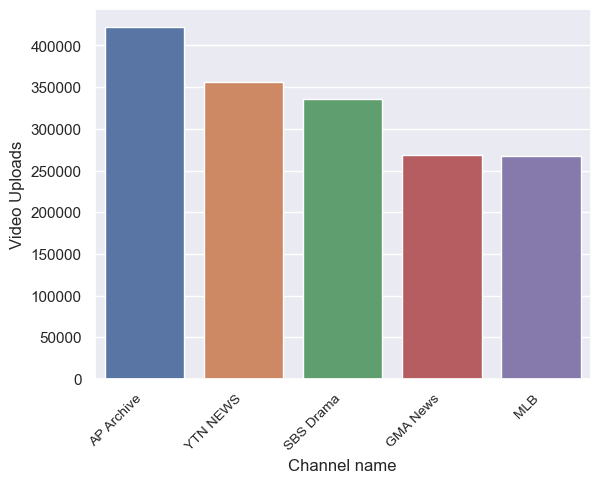

In [207]:
sns.set_style("darkgrid")
sns.barplot(data,x='Channel name',y='Video Uploads')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

# 13. Find Correlation Matrix

In [211]:
df.corr(numeric_only=True)

,Rank,Grade,Video Uploads,Subscribers,Video views
Rank,1.000000,-0.865083,-0.073180,-0.383329,-0.402873
Grade,-0.865083,1.000000,0.088773,0.429213,0.477423
Video Uploads,-0.073180,0.088773,1.000000,0.011362,0.087830
Subscribers,-0.383329,0.429213,0.011362,1.000000,0.791241
Video views,-0.402873,0.477423,0.087830,0.791241,1.000000


### 14.  Which Grade Has A Maximum Number of Video Uploads?

In [229]:
df.groupby('Grade')['Video Uploads'].mean().map(lambda x: f'{x:.2f}')

Grade
1     3136.16
2     4382.58
3     5709.86
4    16960.30
5    37450.70
Name: Video Uploads, dtype: object

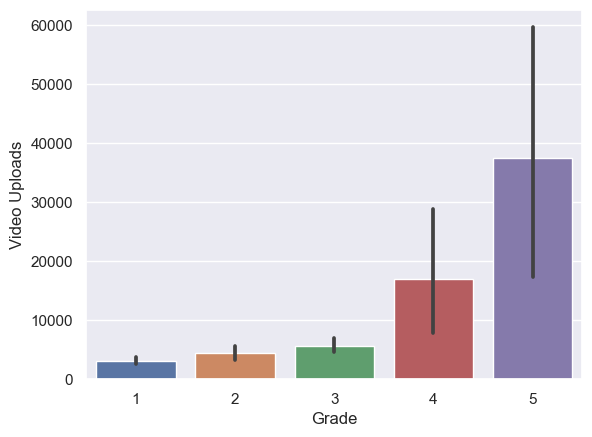

In [248]:
sns.barplot(df,x='Grade',y='Video Uploads')
plt.show()

### 15.Which Grade Has The Highest Average Views?

In [249]:
df.head(2)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5,Zee TV,82757,18752951,20869786591
1,2,5,T-Series,12661,61196302,47548839843


In [254]:
df.groupby('Grade')['Video views'].mean().map(lambda x:f'{x:.2f}')

Grade
1      555183839.09
2     1102450027.69
3     2497972949.11
4     6168741772.73
5    21199091192.80
Name: Video views, dtype: object

<Axes: xlabel='Grade', ylabel='Video views'>

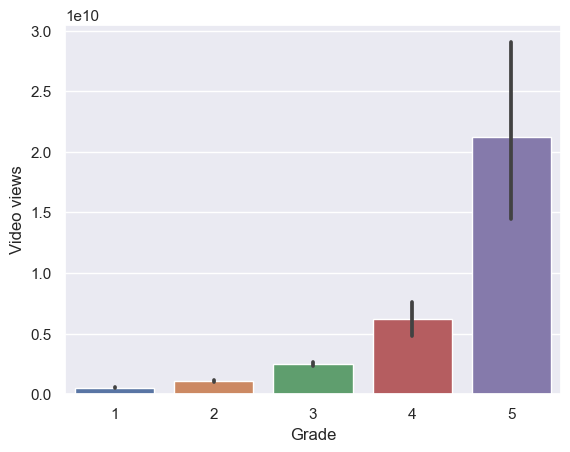

In [255]:
sns.barplot(df,x='Grade',y='Video views')

### 16.  Which Grade Has The Highest Number of Subscribers? 

In [256]:
df.head(2)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5,Zee TV,82757,18752951,20869786591
1,2,5,T-Series,12661,61196302,47548839843


In [266]:
df.groupby('Grade')['Subscribers'].mean().map(lambda x: f'{x:.2f}')

Grade
1     1535207.95
2     2798520.38
3     5107136.29
4    11726947.47
5    22281762.50
Name: Subscribers, dtype: object

<Axes: xlabel='Grade', ylabel='Subscribers'>

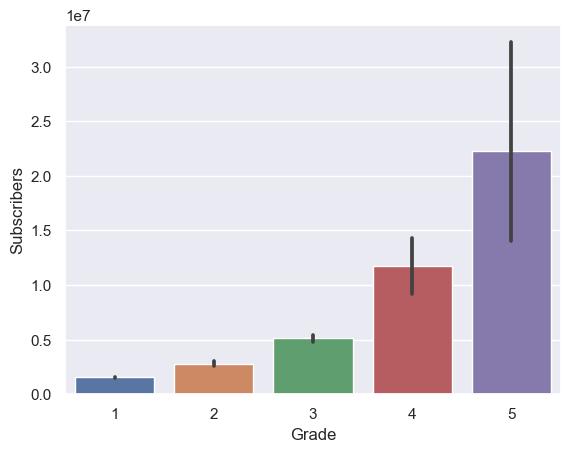

In [269]:
sns.barplot(df,x='Grade',y='Subscribers')

### 17. Which Grade Has The Highest Video Views?

In [261]:
df.head(2)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5,Zee TV,82757,18752951,20869786591
1,2,5,T-Series,12661,61196302,47548839843


<Axes: xlabel='Grade', ylabel='Video views'>

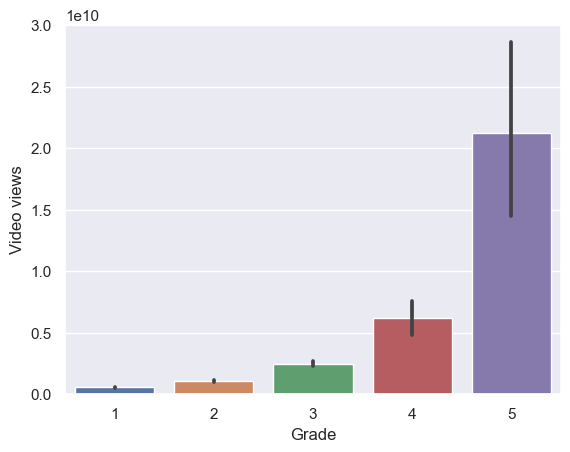

In [273]:
sns.barplot(df,x='Grade',y='Video views')

In [280]:
df.groupby('Grade').mean(numeric_only=True).applymap(lambda x: f'{x:.2f}')

,Rank,Video Uploads,Subscribers,Video views
Grade,,,,
1,3520.54,3136.16,1535207.95,555183839.09
2,1533.99,4382.58,2798520.38,1102450027.69
3,534.29,5709.86,5107136.29,2497972949.11
4,31.32,16960.30,11726947.47,6168741772.73
5,5.50,37450.70,22281762.50,21199091192.80
